# Баланс диференційних спектрів - Масові експерименти
Щоб знати де цей метод працює, а де ні, нам потрібно перевірити багато можливих комбінацій між моделями даних, апроксимуючими моделями, а також розміри датасетів. Цей записник використовується для цих масових тестувань, тому він не буде мати багато діаграм, в основному таблиці з даними.

Основний спосіб перевірки - використовувати апросимуючі поліноми різних порядків для окремих нелінійних процесів.

In [1]:
# Main imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from modules.extra import dsb_fit
from modules.utils import statistics
from modules.polys import polys


# Test function, approximates polys of different ranks
# against given data of varied size.
def mass_test(data: list[tuple[np.ndarray, int]]):
    for d in data:
        n = d[1]
        data_model = d[0]
        results = []
        for i, p in enumerate(polys[1:-1]):
            expr = sp.sstr(p).replace("c", "a")
            try:
                results.append(
                    (dsb_fit(expr, "t", data_model, numeric=False), f"rank{i}")
                )
            except Exception as e:
                print(f"rank{i} failed: {e}")
        display(f"Data model size: {n}")
        statistics(data_model, *results)

## Експоненційне тестування
- Модель даних: $a_0 + e^{a_1 * t}$
- Повільно зростаюча

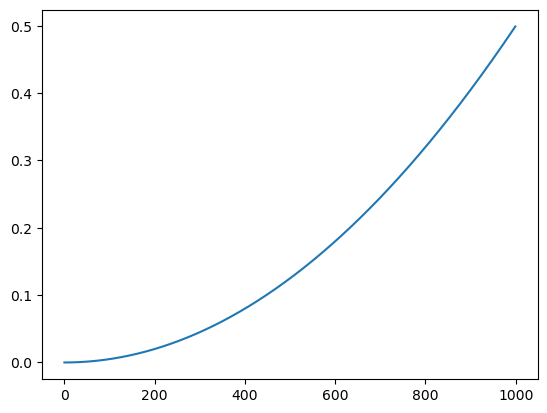

In [2]:
from modules.models import exponential1

dd = exponential1(1000)
plt.plot(dd)
plt.show()

In [3]:
sizes = [10, 100, 1000, 10000]
test_data = [(exponential1(s), s) for s in sizes]

mass_test(test_data)

'Data model size: 10'

         median      variance  std. div.     lin. div.    covariance  concordance
rank0  0.000014  1.670625e-10   0.000013  3.200000e-05  1.670625e-10     0.919631
rank1  0.000010  1.802625e-10   0.000013  2.306296e-19  1.802625e-10     1.000000
rank2  0.000010  1.802625e-10   0.000013  4.664996e-20  1.802625e-10     1.000000
rank3  0.000010  1.802625e-10   0.000013  7.894941e-20  1.802625e-10     1.000000
rank4  0.000010  1.802625e-10   0.000013  8.711399e-20  1.802625e-10     1.000000
rank5  0.000010  1.802625e-10   0.000013  1.287119e-19  1.802625e-10     1.000000
rank6  0.000010  1.802625e-10   0.000013  4.125570e-20  1.802625e-10     1.000000
rank7  0.000010  1.802625e-10   0.000013  4.143031e-20  1.802625e-10     1.000000
data   0.000010  1.802625e-10   0.000013  0.000000e+00  1.802625e-10     1.000000


'Data model size: 100'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0  0.001642  0.000002   0.001429  3.207400e-02    0.000002     0.928954
rank1  0.001225  0.000002   0.001477  6.484043e-18    0.000002     1.000000
rank2  0.001225  0.000002   0.001477  1.607853e-16    0.000002     1.000000
rank3  0.001225  0.000002   0.001477  6.081576e-17    0.000002     1.000000
rank4  0.001225  0.000002   0.001477  1.074404e-16    0.000002     1.000000
rank5  0.001225  0.000002   0.001477  1.387878e-16    0.000002     1.000000
rank6  0.001225  0.000002   0.001477  7.252902e-17    0.000002     1.000000
rank7  0.001225  0.000002   0.001477  1.440503e-16    0.000002     1.000000
data   0.001225  0.000002   0.001477  0.000000e+00    0.000002     1.000000


'Data model size: 1000'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0  0.166417  0.020792   0.144193  3.207495e+01    0.020792     0.930103
rank1  0.124750  0.022181   0.148931  3.873608e-14    0.022181     1.000000
rank2  0.124750  0.022181   0.148931  1.428516e-13    0.022181     1.000000
rank3  0.124750  0.022181   0.148931  4.042785e-14    0.022181     1.000000
rank4  0.124750  0.022181   0.148931  5.950919e-14    0.022181     1.000000
rank5  0.124750  0.022181   0.148931  9.398118e-14    0.022181     1.000000
rank6  0.124750  0.022181   0.148931  9.643095e-14    0.022181     1.000000
rank7  0.124750  0.022181   0.148931  6.530098e-14    0.022181     1.000000
data   0.124750  0.022181   0.148931  0.000000e+00    0.022181     1.000000


'Data model size: 10000'

          median    variance  std. div.     lin. div.  covariance  concordance
rank0  16.664167  208.291667  14.432313  3.207501e+04  208.291667      0.93022
rank1  12.497500  222.180555  14.905722  6.698918e-11  222.180555      1.00000
rank2  12.497500  222.180555  14.905722  2.925189e-10  222.180555      1.00000
rank3  12.497500  222.180555  14.905722  6.382081e-11  222.180555      1.00000
rank4  12.497500  222.180555  14.905722  2.187064e-10  222.180555      1.00000
rank5  12.497500  222.180555  14.905722  5.538070e-11  222.180555      1.00000
rank6  12.497500  222.180555  14.905722  4.741775e-11  222.180555      1.00000
rank7  12.497500  222.180555  14.905722  2.404829e-10  222.180555      1.00000
data   12.497500  222.180555  14.905722  0.000000e+00  222.180555      1.00000


- Модель даних: $a_0 + a_1*t + a_2 * e^{a_3*t}$
- Швидко зростаюча

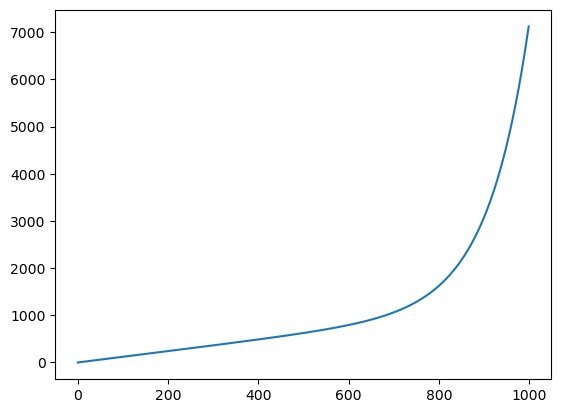

In [4]:
from modules.models import exponential2

dd = exponential2(1000)
plt.plot(dd)
plt.show()

In [5]:
sizes = [10, 100, 1000, 10000]
test_data = [(exponential2(s), s) for s in sizes]

mass_test(test_data)

'Data model size: 10'

         median   variance  std. div.     lin. div.  covariance  concordance
rank0  5.505127  11.902903   3.450058  4.069303e-04   11.902903          1.0
rank1  5.505076  11.902903   3.450058  3.748685e-06   11.902903          1.0
rank2  5.505076  11.902903   3.450058  2.400199e-08   11.902903          1.0
rank3  5.505076  11.902903   3.450058  1.072010e-10   11.902903          1.0
rank4  5.505076  11.902903   3.450058  4.579254e-13   11.902903          1.0
rank5  5.505076  11.902903   3.450058  2.552403e-13   11.902903          1.0
rank6  5.505076  11.902903   3.450058  2.231548e-13   11.902903          1.0
rank7  5.505076  11.902903   3.450058  1.898481e-13   11.902903          1.0
data   5.505076  11.902903   3.450058  0.000000e+00   11.902903          1.0


'Data model size: 100'

          median     variance  std. div.     lin. div.   covariance  concordance
rank0  59.581197  1203.790967  34.695691  6.843438e-01  1203.790967          1.0
rank1  59.572320  1203.791030  34.695692  6.321343e-02  1203.791030          1.0
rank2  59.572320  1203.791030  34.695692  4.362621e-03  1203.791030          1.0
rank3  59.572377  1203.791030  34.695692  2.403547e-04  1203.791030          1.0
rank4  59.572377  1203.791030  34.695692  1.101923e-05  1203.791030          1.0
rank5  59.572377  1203.791030  34.695692  4.323522e-07  1203.791030          1.0
rank6  59.572377  1203.791030  34.695692  1.492026e-08  1203.791030          1.0
rank7  59.572377  1203.791030  34.695692  4.527852e-10  1203.791030          1.0
data   59.572377  1203.791030  34.695692  0.000000e+00  1203.791030          1.0


'Data model size: 1000'

            median      variance    std. div.      lin. div.    covariance  concordance
rank0  1140.713120  1.239999e+06  1113.552375  616764.207116  1.239999e+06     0.713179
rank1   539.672800  1.689171e+06  1299.681005  404388.567860  1.689171e+06     0.921444
rank2   498.426019  1.892497e+06  1375.680677  219855.146090  1.892497e+06     0.975937
rank3   670.883721  1.954213e+06  1397.931799  101699.099666  1.954213e+06     0.995383
rank4   670.883721  1.967629e+06  1402.721989   40827.037558  1.967629e+06     0.998804
rank5   618.226992  1.969813e+06  1403.500297   14449.415104  1.969813e+06     0.999915
rank6   618.226992  1.970089e+06  1403.598415    4565.621719  1.970089e+06     0.999985
rank7   624.153045  1.970116e+06  1403.608257    1301.619861  1.970116e+06     0.999999
data    623.735350  1.970119e+06  1403.609117       0.000000  1.970119e+06     1.000000


'Data model size: 10000'

             median      variance     std. div.     lin. div.    covariance  concordance
rank0  5.353151e+44  8.287094e+89  9.103348e+44  1.251289e+49  8.287094e+89     0.099908
rank1  5.509343e+43  2.112164e+90  1.453329e+45  1.360707e+49  2.112164e+90     0.240163
rank2  1.491106e+44  3.721759e+90  1.929186e+45  1.394948e+49  3.721759e+90     0.387316
rank3  3.541450e+43  5.508921e+90  2.347109e+45  1.376091e+49  5.508921e+90     0.525050
rank4  7.865079e+43  7.327508e+90  2.706937e+45  1.317191e+49  7.327508e+90     0.642541
rank5  2.868538e+43  9.052744e+90  3.008778e+45  1.227959e+49  9.052744e+90     0.738163
rank6  4.974413e+43  1.059351e+91  3.254768e+45  1.117018e+49  1.059351e+91     0.812692
rank7  2.458032e+43  1.189683e+91  3.449178e+45  9.926545e+48  1.189683e+91     0.869281
data   7.652696e+22  1.547420e+91  3.933727e+45  0.000000e+00  1.547420e+91     1.000000


## Трансцендентальне тестування
- Модель даних: $a_1*sin(a_2*t) + a_3*cos(a_2*t)$
- Періодична, Викривлена

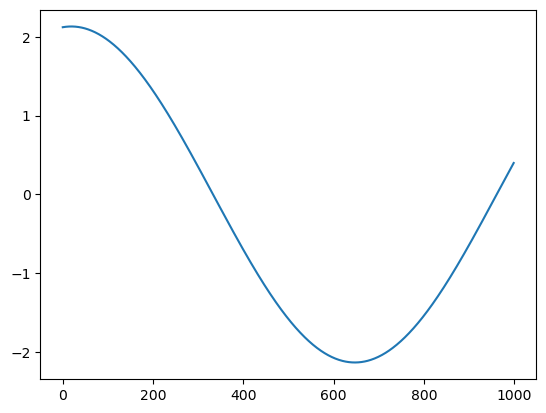

In [6]:
from modules.models import transcendental1

dd = transcendental1(1000)
plt.plot(dd)
plt.show()

In [7]:
sizes = [10, 100, 1000, 10000]
test_data = [(transcendental1(s), s) for s in sizes]

mass_test(test_data)

'Data model size: 10'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0  2.123744  0.000005   0.002186  1.699100e-03    0.000005     0.991463
rank1  2.123956  0.000005   0.002195  5.100323e-07    0.000005     1.000000
rank2  2.123956  0.000005   0.002195  2.070812e-08    0.000005     1.000000
rank3  2.123956  0.000005   0.002195  3.013145e-12    0.000005     1.000000
rank4  2.123956  0.000005   0.002195  7.105427e-14    0.000005     1.000000
rank5  2.123956  0.000005   0.002195  1.110223e-14    0.000005     1.000000
rank6  2.123956  0.000005   0.002195  1.065814e-14    0.000005     1.000000
rank7  2.123956  0.000005   0.002195  1.687539e-14    0.000005     1.000000
data   2.123956  0.000005   0.002195  0.000000e+00    0.000005     1.000000


'Data model size: 100'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0  2.082545  0.002179   0.046680  1.680375e+00    0.002179     0.835512
rank1  2.104360  0.002560   0.050595  1.111569e-02    0.002560     0.999997
rank2  2.104360  0.002560   0.050595  2.237206e-03    0.002560     1.000000
rank3  2.104389  0.002560   0.050595  8.728374e-06    0.002560     1.000000
rank4  2.104389  0.002560   0.050595  1.172526e-06    0.002560     1.000000
rank5  2.104389  0.002560   0.050595  3.245624e-09    0.002560     1.000000
rank6  2.104389  0.002560   0.050595  3.288307e-10    0.002560     1.000000
rank7  2.104389  0.002560   0.050595  7.127632e-13    0.002560     1.000000
data   2.104389  0.002560   0.050595  0.000000e+00    0.002560     1.000000


'Data model size: 1000'

         median  variance  std. div.   lin. div.  covariance  concordance
rank0 -0.377074  1.067099   1.033005  872.581528    1.067099     0.659161
rank1 -0.893595  1.906142   1.380631  360.729482    1.906142     0.943756
rank2 -0.688046  2.061362   1.435744  129.389965    2.061362     0.994475
rank3 -0.706441  2.082697   1.443155   30.842118    2.082697     0.999396
rank4 -0.664871  2.083920   1.443579    7.249513    2.083920     0.999973
rank5 -0.671680  2.083989   1.443603    1.210325    2.083989     1.000000
rank6 -0.671480  2.083991   1.443603    0.211355    2.083991     1.000000
rank7 -0.671459  2.083991   1.443603    0.027183    2.083991     1.000000
data  -0.671451  2.083991   1.443603    0.000000    2.083991     1.000000


'Data model size: 10000'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0 -0.010978  0.001117   0.033416  13514.420929    0.001117     0.000989
rank1 -0.008330  0.001122   0.033500  13514.469101    0.001122     0.000994
rank2 -0.010039  0.003741   0.061164  13505.954070    0.003741     0.003310
rank3 -0.025425  0.008154   0.090300  13483.415873    0.008154     0.007201
rank4 -0.037168  0.011516   0.107312  13471.084591    0.011516     0.010154
rank5 -0.018897  0.050981   0.225790  13270.306192    0.050981     0.044189
rank6 -0.020950  0.052729   0.229628  13261.555981    0.052729     0.045670
rank7 -0.015838  0.169407   0.411590  12671.281893    0.169407     0.139669
data  -0.017666  2.256412   1.502136      0.000000    2.256412     1.000000


- Модель даних: $a_1*cos(a_2*t) + a_3*sin(a_2*t) + a_4*cos(a_2*t)$
- Періодична

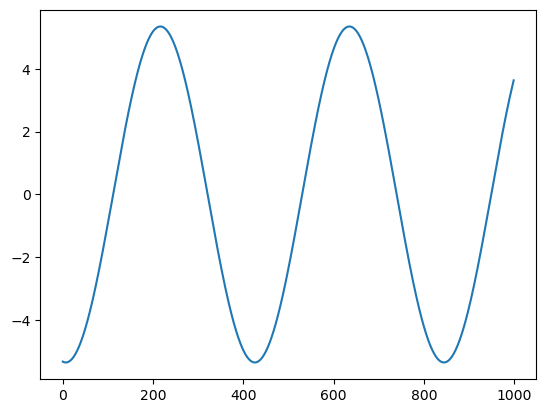

In [8]:
from modules.models import transcendental3

dd = transcendental3(1000)
plt.plot(dd)
plt.show()

In [9]:
sizes = [10, 100, 1000, 10000]
test_data = [(transcendental3(s), s) for s in sizes]

mass_test(test_data)

'Data model size: 10'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0 -5.339348  0.000060   0.007748  3.846466e-02    0.000060     0.766174
rank1 -5.343542  0.000079   0.008894  1.627106e-05    0.000079     1.000000
rank2 -5.343540  0.000079   0.008894  4.219692e-06    0.000079     1.000000
rank3 -5.343541  0.000079   0.008894  8.793855e-10    0.000079     1.000000
rank4 -5.343541  0.000079   0.008894  1.401661e-10    0.000079     1.000000
rank5 -5.343541  0.000079   0.008894  2.398082e-14    0.000079     1.000000
rank6 -5.343541  0.000079   0.008894  2.486900e-14    0.000079     1.000000
rank7 -5.343541  0.000079   0.008894  2.842171e-14    0.000079     1.000000
data  -5.343541  0.000079   0.008894  0.000000e+00    0.000079     1.000000


'Data model size: 100'

         median  variance  std. div.     lin. div.  covariance  concordance
rank0 -3.894269  1.713105   1.308856  2.986422e+01    1.713105     0.926317
rank1 -4.279931  1.832128   1.353561  2.851457e+00    1.832128     0.999693
rank2 -4.279931  1.833213   1.353962  3.610783e-01    1.833213     0.999989
rank3 -4.284641  1.833231   1.353968  2.039676e-02    1.833231     1.000000
rank4 -4.284641  1.833231   1.353969  1.712341e-03    1.833231     1.000000
rank5 -4.284663  1.833231   1.353969  6.867227e-05    1.833231     1.000000
rank6 -4.284663  1.833231   1.353969  4.336697e-06    1.833231     1.000000
rank7 -4.284663  1.833231   1.353969  1.342789e-07    1.833231     1.000000
data  -4.284663  1.833231   1.353969  0.000000e+00    1.833231     1.000000


'Data model size: 1000'

         median   variance  std. div.    lin. div.  covariance  concordance
rank0 -0.298484   0.059956   0.244860  3323.793336    0.059956     0.008605
rank1 -0.075953   0.593577   0.770439  3253.254093    0.593577     0.081274
rank2 -0.386839   1.204017   1.097277  3104.314104    1.204017     0.159987
rank3 -0.622287   1.526279   1.235427  3043.571807    1.526279     0.198518
rank4 -0.105197   7.723632   2.779142  2133.221553    7.723632     0.711427
rank5 -0.099340   9.406766   3.067045  1850.046125    9.406766     0.803968
rank6 -0.464501  13.155869   3.627102   685.904843   13.155869     0.974797
rank7 -0.292118  13.483674   3.672012   518.713104   13.483674     0.985608
data  -0.498163  13.835007   3.719544     0.000000   13.835007     1.000000


'Data model size: 10000'

         median   variance  std. div.     lin. div.  covariance  concordance
rank0  0.024172   0.003088   0.055569  33975.733299    0.003088     0.000433
rank1 -0.003616   0.005477   0.074009  33972.028416    0.005477     0.000768
rank2  0.006666   0.013050   0.114239  33961.061538    0.013050     0.001828
rank3 -0.002524   0.015451   0.124303  33957.957597    0.015451     0.002164
rank4  0.004865   0.028152   0.167786  33940.650866    0.028152     0.003940
rank5  0.004158   0.028856   0.169870  33940.546674    0.028856     0.004038
rank6  0.004215   0.046905   0.216576  33916.741449    0.046905     0.006556
rank7  0.004482   0.047354   0.217609  33914.698556    0.047354     0.006619
data   0.044615  14.260392   3.776293      0.000000   14.260392     1.000000
